In [1]:
import json
from sklearn.manifold import TSNE
from numpy.linalg import norm
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
CBOW=False
if CBOW==True:
    vocab_file ="./data/cbow_words.json"
    model_file ="./data/cbow_model.json"
    img_path="images/cbow.png"
else:
    vocab_file ="./data/svd_vocab.json"
    model_file ="./data/svd_model.json"
    img_path="images/svd.png"

In [2]:
with open(vocab_file) as f:
    vocab = json.load(f)

In [3]:
with open(model_file) as f:
    model = json.load(f)

In [4]:
similarity={}
for word in vocab:
    a = model["camera"]
    b = model[word]
    if word == "camera":
        continue
    similarity[word]= np.dot(a, b)/(norm(a)*norm(b))

In [5]:
sorted_words = [k for k, v in sorted(similarity.items(), key=lambda item: item[1], reverse=True)]

In [6]:
sorted_words[:10]

['camer',
 'cam',
 'camcorder',
 'scope',
 'camara',
 'microscope',
 'telescope',
 'monopod',
 'binocular',
 'board']

In [7]:
test_words= ["eating","new","dancing","enormous","tv"]
X=[]
labels=[]

In [8]:
for w in tqdm(test_words):
    similarity={}
    for word in vocab:
        a = model[w]
        b = model[word]
        similarity[word]= np.dot(a, b)/(norm(a)*norm(b))
    sorted_words = [k for k, v in sorted(similarity.items(), key=lambda item: item[1], reverse=True)][:11]
    for s in sorted_words:
        X.append(model[s])
        labels.append(s)

  0%|          | 0/5 [00:00<?, ?it/s]

In [9]:
X = TSNE(n_components=2).fit_transform(X)

In [10]:
y = [i[1] for i in X]
x = [i[0] for i in X]

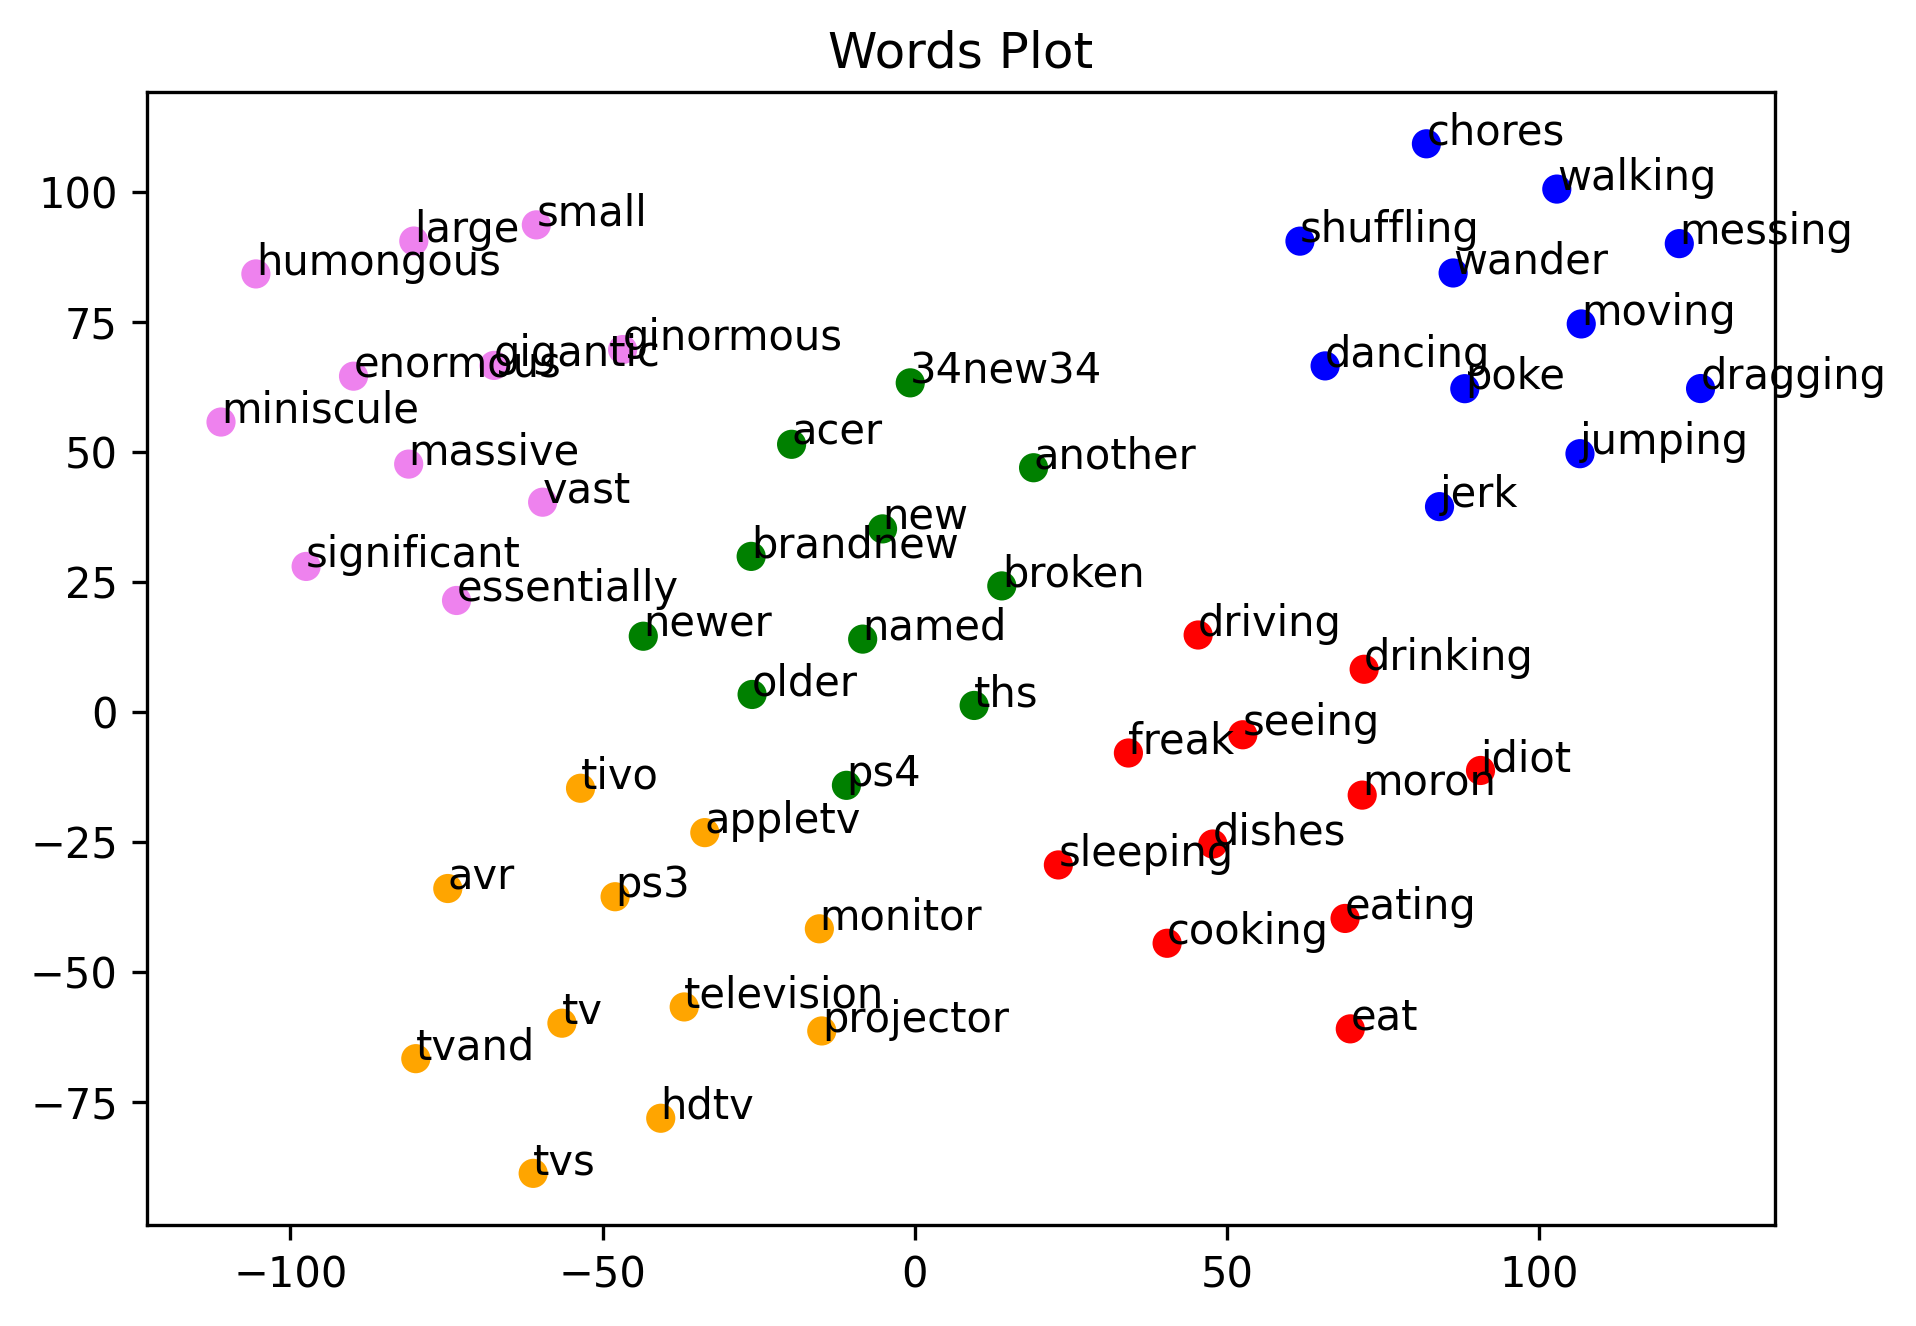

In [11]:
plt.figure(facecolor="white",figsize=(7,5),dpi=300)
color= ["red"]*11 +["green"]*11+ ["blue"]*11+ ["violet"]*11 + ["orange"]*11
plt.scatter(x,y,c=color)
for i,label in enumerate(labels):
    plt.annotate(label,(x[i],y[i]))
plt.title("Words Plot")
plt.savefig(img_path,dpi=300)
plt.show()